# Task Description: Intent Prediction

![41598_2020_73622_Fig1_HTML.png.webp](attachment:41598_2020_73622_Fig1_HTML.png.webp)

## Dataset 

Origin: The Coveo Data Challenge: Aftermath of SIGIR Ecom 2021. https://www.coveo.com/blog/sigir-ecommerce-data-challenge/

The following description is found here: https://github.com/coveooss/SIGIR-ecom-data-challenge


### Overview
Coveo hosted the [2021 SIGIR eCom](https://sigir-ecom.github.io) Data Challenge 
and this repository contains utility scripts and the dataset, which is freely
available for research purposes (see below): the paper introducing the Challenge is [available](https://arxiv.org/abs/2104.09423) as 
a pre-print. 

The Data Challenge 
original README (containing baseline information, design papers, solutions, etc.)
is archived in this repository as `README_DC_2021.md`. Background information 
about the Challenge, the motivations behind the release and some inspiring submissions
 can be found in the original [paper](https://arxiv.org/abs/2104.09423), the archival section in `README_DC_2021.md`
 and the SIGIR [presentation](https://drive.google.com/file/d/1O0BSAhgJFzx1ddeExxAEGnP_836AftNT/view).

_Note: there has been some issues when downloading the file using Safari; 
we suggest you to use Chrome for the download and sign-up process._

### License

The dataset is available for research and educational purposes at 
[this page](https://www.coveo.com/en/ailabs/sigir-ecom-data-challenge). 
To obtain the dataset, you are required to fill a form with information about you 
and your institution, and agree to the Terms And Conditions for fair usage of the data. 
For convenience, Terms And Conditions are also included in a pure `txt` format in this repo:
usage of the data implies the acceptance of these Terms And Conditions.

### Dataset

#### Data Description

The dataset is provided as three big text files (`.csv`) - `browsing_train.csv`, `search_train.csv`, `sku_to_content.csv` - 
inside a `zip` archive containing an additional copy of the _Terms And Conditions_. The final dataset contains 36M events, 
and it is the first dataset of this kind to be released to the research community: please review the 
[Data Challenge paper](https://arxiv.org/abs/2104.09423) 
for a comparison with existing datasets and for the motivations behind the release format. 
For your convenience, three sample files are included in the `start` folder, showcasing the data structure. 
Below, you will find a detailed description for each file.

##### Browsing Events

The file `browsing_train.csv` contains almost 5M anonymized shopping [sessions](https://support.google.com/analytics/answer/2731565?hl=en).
The structure of this dataset is similar to our [Scientific Reports](https://github.com/coveooss/shopper-intent-prediction-nature-2020) data release: 
each row corresponds to a browsing event in a session, containing session and timestamp information, as well as 
(hashed) details on the interaction (was it _purchase_ or a _detail_ event? Was it a simple _pageview_ or a specific
product action?). All data was collected and processed in an anonymized fashion through our standard [SDK](https://docs.coveo.com/en/3188/coveo-for-commerce/tracking-commerce-events):
remember that front-end tracking is by nature imperfect, so small inconsistencies are to be expected.

Field | Type | Description
------------ | ------------- | -------------
session_id_hash | string | Hashed identifier of the shopping session. A session groups together events that are at most 30 minutes apart: if the same user comes back to the target website after 31 minutes from the last interaction, a new session identifier is assigned.
event_type | enum | The type of event according to the [Google Protocol](https://developers.google.com/analytics/devguides/collection/protocol/v1), one of { _pageview_ , _event_ }; for example, an _add_ event can happen on a page load, or as a stand-alone event.
product_action | enum | One of { _detail_, _add_, _purchase_, _remove_ }. If the field is empty, the event is a simple page view (e.g. the `FAQ` page) without associated products. Please also note that an action involving removing a product from the cart might lead to several consecutive _remove_ events. <br>Please note that _click_ events (that is, events generated by clicking on a search page) are included in the `search_train.csv` file.
product_sku_hash | string | If the event is a _product_ event, hashed identifier of the product in the event.
server_timestamp_epoch_ms | int | Epoch time, in milliseconds. As a further anonymization technique, the timestamp has been shifted by an unspecified amount of weeks, keeping intact the intra-week patterns.
hashed_url | string | Hashed url of the current web page.

Finally, please be aware that a PDP may generate both a _detail_ and a _pageview_ event, and that the order of the events in the 
file is not strictly chronological (refer to the session identifier and the timestamp information to reconstruct the 
actual chain of events for a given session). 

##### Search Events

The file `search_train.csv` contains more than 800k search-based interactions. Each row is a search query event issued by a shopper, which includes an array of (hashed) results returned to the client. We also provide which result(s) have been clicked from the result set, if any. 
By reporting also products seen but not clicked, we hope to inspire clever ways to use negative feedback. 

Field | Type | Description
------------ | ------------- | -------------
session_id_hash | string | Hashed identifier of the shopping session. A session groups together events that are at most 30 minutes apart: if the same user comes back to the target website after 31 minutes from the last interaction, a new session identifier is assigned.
server_timestamp_epoch_ms | int | Epoch time, in milliseconds. As a further anonymization technique, the timestamp has been shifted by an unspecified amount of weeks, keeping intact the intra-week patterns.
query_vector | vector | A dense representation of the search query, obtained through standard pre-trained modeling and dimensionality reduction techniques.
product_skus_hash | list | Hashed identifiers of the products in the search response.
clicked_skus_hash | list | Hashed identifiers of the products clicked after issuing the search query.


##### Catalog Metadata

The file `sku_to_content.csv` contains a mapping between (hashed) product identifiers (SKUs) and dense representation
of textual and image meta-data from the actual catalog, for all the SKUs in the training and the Challenge evaluation
dataset (when the information is available).

Field | Type | Description
------------ | ------------- | -------------
product_sku_hash | string | Hashed identifier of product ID (SKU).
category_hash | string | The categories are hashed representations of the category hierarchy, `/`-separated.
price_bucket | int | The product price, provided as a 10-quantile integer.
description_vector | vector | A dense representation of textual meta-data, obtained through standard pre-trained modeling and dimensionality reduction techniques. Please note that this representation is compatible with the one in the search file.
image_vector| vector | A dense representation of image meta-data, obtained through standard pre-trained modeling and dimensionality reduction techniques.


### What do we see?

* the <font color='green'>hashed session ID</font>: two actions get the same session ID (hashed for privacy reasons) if they:
    * are consecutive
    * are performed by the same user
    * are no more than 30m apart (this is an industry standard)

* the <font color='green'>event type</font>, which tells us whether the event involved a specific product or not (e.g., searches, result pages, homepage, ...)

* the <font color='green'>product action</font>, indicating how a user interacted with a specific product (checking the product detail, adding it to cart, removing it from cart, purchasing).

* the <font color='green'>product SKU</font> (hashed for privacy) which indicates which specific product was being checked. If the event type is *pageview*, both product action and product SKU are logically not available.

* the <font color='green'>timestamp</font> of the action, in absolute time, from which we can derive information such as the DoW and the time of the day of a certain session, as well as the time occurred between two consecutive actions.

* the <font color='green'>url</font> the user was visiting (hashed for privacy).

### What don't we see?

- Information about products: we'll see them later.
- Information about users: this is on purpose, we'll see why!

## Why to work with less data
- Colds start problem
- Data privacy
- Runs faster
- Scalable
- Easier interpretable
- Reduced computational cost
- Improved generalization
- Faster iteration time

## Intent prediction

In its more general form, it boils down to anticipating what users will do during a browsing session. 

## Why?
If we can predict what users want to do, we can take targeted actions to nudge them towards the action that maximises our utility: 

- keep users on the website longer (like <font color='blue'>FB</font> and <font color='blue'>Twitter</font> do) and thus see more ads
- convince them to watch one more video, and thus one more ad (as <font color='red'>YT</font> does)
- convince them to purchase one more item or a more expensive item or an item where our margin is higher (like <font color='orange'>Amazon</font> does). 

Intent prediction's business utility is tied to how effective the nudges we can implement are. From a scientific perspective, intent prediction is however interesting in its own right: to what extent can behavior (observed) inform about goals and motives (not observed)? What details about behavior do we need to adequatly infer goals?

Also, if we can nudge users to buy something we can maybe improve our conversion rate, i.e. the proportion of visits where a user leaves after purchasing at least one item. Conversion rates are incredibly low for most eCommerce websites (around ~5%)

## What?
There are several intentions that can be predicted but here we focus on an eCommerce setting and on two very simple steps in a user trajectory: purchasing and adding to cart.

### purchase v. no-purchase
Will a user buy something by the end of the session?

If we can detect someone is going to buy, we may decide not to offer discounts. If we detect someone is window-shopping, we may want to offer a discount to trigger a purchase or offer a coupon to come back and buy. Challenges: class imbalance and overfitting!

### cart abandonement
Very similar to the first one but limited to sessions where an item was added to cart. Cart abandonement is also affected by attrition factors, e.g. difficulty at payment time, so intent is only a part of the story.

Class imbalance here is more moderate since purchases are more frequent among users who add something to cart but if we have to wait for an add-to-cart we might lose window-shoppers and can only predict later in the session.


## Challenges:

* <font color='purple'>privacy, GDPR, and bad press</font>: storing personal information on customers is tricky from a legal standpoint and is considered less and less favorably by customers. Can we predict without relying on personal info (age, sex, gender, education level, wealth, ...)?

* <font color='purple'>zero-shot prediction</font>: even if we rely on customer information, very often we don't have it because we have to predict a user's intent the first time we see that user, who doesn't have an account on the website or isn't logged in, so no personal info available (sure, third party cookies, but see the previous point). This type of user is the vast majority, especially for mid and small e-commerce platforms.

* <font color='purple'>predicting in real time</font>: some studies take full sessions as input, but if we can only find out a user will leave when they've already left, our algorithm is no good ->


## Early prediction

Same as intent prediction conceptually, but performed on unfolding sessions and thus partial information. We can aim to predict the next action or the next product (closer to recommender systems) or the overarching intent.

Higher business value, since we can take action at the right time; but much more challenging, since we predict based on fewer events and thus less information.

Let's get rolling now!


## Other click data

### Time information

* <font color='blue'>dwell times</font>: the time which elapses between two consecutive actions within the same session. Can indicate interest or lack thereof. "die Zeit, die zwischen zwei aufeinanderfolgenden Aktionen innerhalb derselben Sitzung verstreicht. Kann auf Interesse oder mangelndes Interesse hinweisen."

![dwellTimes.png](attachment:dwellTimes.png)

* <font color='blue'>seasonality</font>: the period of the year (and possible holidays), the day of the week, the time of the day (geolocalised at least to the time-zone) can all skew the intentions of a user.

![seasonality.png](attachment:seasonality.png)

### Product information

* <font color='violet'>SKUs</font>: the identity of the product, without any further info. A website may have best-selling products, such that knowing a user checked it can improve our prediction.

* <font color='violet'>Category</font>: any organisation of the products, based on a product tree, such that more similar products get the same category. Once again, checking certain products could indicate a higher propension to buy (also interacts with seasonality!)

![noun-chart-4408232.png](attachment:noun-chart-4408232.png)

* <font color='violet'>Price bucket</font>: how expensive a product is, binned to avoid overfitting.

* <font color='violet'>Product embeddings</font>: much like word embeddings, these are distributed representations of products based on the other products with which they're typically checked. Two products that feature in similar sessions (i.e., which feature similar products) will be more similar. Similarity of embeddings can correlate with pre-defined categories but can also diverge.

![productEmbeddings.png](attachment:productEmbeddings.png)

* <font color='violet'>Image embeddings</font>: distributed representations of products based on their images, obtained using Computer Vision tools. Same idea as the product embeddings. 

![imageEmbeddings.png](attachment:imageEmbeddings.png)


### Search information

* already knowing whether the session started with a search query or not may inform us about intent

* we can embed the query using <font color='red'>NLP tools</font> and use the distributed representation of the query to refine our prediction

In [1]:
# TODO check naming convention

# Mount Drive

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# Installation

In [3]:
# lets see what we need 
# !pip install scikit_optimize
# !pip install lightgbm
# !pip install auto-sklearn 
# !pip install seaborn #TODO uncomment
# !pip install matplotlib #TODO uncomment
# !pip install plotly #TODO uncomment
# !pip install sklearn

# Imports

In [4]:
# imports
import os
import copy
import numpy as np
import pandas as pd
import pickle as pkl
from collections import Counter, defaultdict
import time

import datetime
from datetime import timedelta
import json
from itertools import product
from tqdm import tqdm
import multiprocessing as mp

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.pyplot import figure

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve


# Load the data (Task 1)

In [5]:
# DATA_FOLDER = 'drive/MyDrive/Tilburg/Analysis_of_customer_data/data'
DATA_FOLDER = 'data'

In [6]:
# create directories
os.makedirs(DATA_FOLDER,exist_ok=True)
DATA_FOLDER_PREPROCESSING = os.path.join(DATA_FOLDER,'processing')
os.makedirs(DATA_FOLDER_PREPROCESSING,exist_ok=True)
DATA_FOLDER_TEST_DATA = os.path.join(DATA_FOLDER,'test_data')
os.makedirs(DATA_FOLDER_TEST_DATA,exist_ok=True)
DATA_FOLDER_SUBMISSION = os.path.join(DATA_FOLDER,'submission')
os.makedirs(DATA_FOLDER_SUBMISSION,exist_ok=True)

In [7]:
%%time
# read the data
df_raw = pd.read_csv(os.path.join(DATA_FOLDER,'data.csv'), header = 0, sep = ',') #ordered by time

# dummy data for faster execution
# df_raw = pd.read_csv(os.path.join(DATA_FOLDER,'data_subset.csv'), header = 0, sep = ',') #ordered by time
# df_raw = df_raw[:10000]

df_test_real = pd.read_csv(os.path.join(DATA_FOLDER,'data_eval.csv'), header = 0, sep='\t') #ordered by time

Wall time: 40 s


In [8]:
# simple inspection of the dataset
display(len(df_raw))
display(df_raw.describe())
print('event types: {}'.format(set(df_raw['event_type'])))
print('product actions: {}'.format(set(df_raw['product_action'])))
print('unique session IDs: {}'.format(len(set(df_raw['session_id_hash']))))
print('unique product SKUs: {}'.format(len(set(df_raw['product_sku_hash']))))

30451347

,server_timestamp_epoch_ms
count,3.045135e+07
mean,1.550765e+12
std,2.264207e+09
min,1.547529e+12
25%,1.548696e+12
50%,1.550503e+12
75%,1.552489e+12
max,1.555301e+12


event types: {'event_product', 'pageview'}
product actions: {nan, 'detail', 'add', 'purchase', 'remove'}
unique session IDs: 4187127
unique product SKUs: 54035


# Data Pipeline Functions



## Fill na values of sessions

In [9]:
# fill na values
def prep_1_fill_na(df):
    df['product_action'] = df['product_action'].fillna('view')
    return df

## Task 1.1: Create sessions (Group by session_id_hash) 
- Collect product_action, product_sku_hash and server_timestamp_epoch_ms in lists

In [10]:
# group the dataset by sessions. This one saves the actions, products looked at and the timestamp in a list for each session
def prep_2_group(df):
    df = df.groupby('session_id_hash')[['product_action','product_sku_hash','server_timestamp_epoch_ms']].agg(list).reset_index()
    return df

In [11]:
# group the dataset by sessions. Only aggregate actions
def prep_2_group_no_time(df):
    df = df.groupby('session_id_hash')['product_action'].agg(list).reset_index()
    return df

## Task 1.2: Discard sessions with at least one add-to-cart

In [12]:
# This function removes every session that has no add actions
# TODO ask if needed
def prep_2_2_filterAdd(df):

    df['add_count'] = np.where(df.product_action.map(set(['add']).issubset), 1, 0)
    df = df[df['add_count'] > 0]
    df = df.drop('add_count', axis=1)
    df = df.reset_index(drop=True)

    return df

## Task 1.3: Add BUY and No BUY Label

In [13]:
# add class label to each session (BUY V. NO-BUY)
def prep_3_label(df):
    df['purchase'] = np.where(df.product_action.map(set(['purchase']).issubset), 1, 0)
    return df

## Task 1.4: Cut sessions before last purchase/buy

The code above is not very efficient nor tidy, but it's pretty transparent. How would you improve it? Consider solutions which improve 
- speed, especially with larger DataFrames;
- tidyness, can you use Pandas routines and write less code? 

Think about this at home, play around and share your solution on the discussion board to complement what we discuss in class!

In [14]:
# %%time
# # cut BUY sessions to last event before purchase
# sequence_action = []
# for session in df['product_action']:
#     if 'purchase' in set(session):
#         for e in range(len(session)):
#             if session[e] == 'purchase':
#                 sequence_action.append(session[:e])
#                 break
#     else:
#         sequence_action.append(session)
# df['session'] = sequence_action
# # df = df[['session_id_hash', 'session', 'purchase']]
# # df.head()

In [15]:
# new code that cuts session before last buy. Also cuts timestamps
def cutBeforeLastBuy_session(session, purchase):
  # if no purchase: return the timestamps and actions without any cut
  if purchase == 0:
    return session

  else:
    for i in range(len(session)):
      if session[i] == 'purchase':
        return session[:i]

def cutBeforeLastBuy_time(session, timestamps, purchase):
  # if no purchase: return the timestamps and actions without any cut
  if purchase == 0:
    return  timestamps

  else:
    for i in range(len(session)):
      if session[i] == 'purchase':
        return timestamps[:i]

def prep_4_cutBeforeLastBuy(df):
  df['session'] = [cutBeforeLastBuy_session(session, purchase) for session, purchase in zip(df['product_action'], df['purchase'])]
  
  try:
    df['server_timestamp_epoch_ms'] = [cutBeforeLastBuy_time(session, timestamps, purchase) for session, timestamps, purchase in zip(df['product_action'],df['server_timestamp_epoch_ms'], df['purchase'])]
  except:
    print('No time column')
  df = df.drop('product_action',axis=1)
  return df

## Task 1.4 Cut session x after add to cart TODO 

In [16]:
# new code that cuts session x actions after first add-to cart
def cutBeforeAfterAdd_session(session, timestamps, keep_x_after_add):

    for i in range(len(session)):
        if session[i] == 'add':
            return session[:i+keep_x_after_add+1]

def cutBeforeAfterAdd_time(session, timestamps, keep_x_after_add):
    for i in range(len(session)):
        if session[i] == 'add':
            return timestamps[:i+keep_x_after_add+1]

def prep_4_cutAfterAdd(df, keep_x_after_add):
  df['session'] = [cutBeforeAfterAdd_session(session, timestamps, keep_x_after_add) for session, timestamps in zip(df['product_action'],df['server_timestamp_epoch_ms'])]
  df['server_timestamp_epoch_ms'] = [cutBeforeAfterAdd_time(session, timestamps, keep_x_after_add) for session, timestamps in zip(df['product_action'],df['server_timestamp_epoch_ms'])]
  df = df.drop('product_action',axis=1)
  return df

In [17]:
# session = ["view", "add", "view", "test", "view", "view", "view", "view"] # -> ["view", "view", "view", "view", "view"]. Is this correct?

# test = cutBeforeAfterAdd_session(session, None, 5)
# test

In [18]:
# show distribution of session length by label
def prep_5_create_session_len(df):
    df['session_len'] = [len(x) for x in df['session']] # df.session.map(len)
    return df

## Task 1.5: Remove outliers

In [19]:
# removing very short and very long sessions
def prep_6_remove_outliers(df, start, end):
    df.drop(df[df.session_len < start].index, inplace=True)
    df.drop(df[df.session_len > end].index, inplace=True)
    return df

## Task 1.6: Symbolisation 

Question

I mapped events to numbers based on event frequency. Is it the only possibility? If yes, why? If no, what other options are there and is one better?

After symbolisation, each event is a number: should we actually treat them as numbers or not? why?

In [20]:


# sessions = df['session'].to_list()
# labels = df['purchase'].to_list()

# counts = Counter([item for session in sessions for item in session])
# # I'm not going to use it, but I'm saving the 0 for padding sessions when symbolising
# symbol2idx = {symbol: idx for idx, symbol in enumerate(sorted(counts, key=counts.get, reverse=True), 1)}
# print(symbol2idx)

# symbolised_sessions = []
# for idx, session in enumerate(sessions):
#     symbolised_session = [symbol2idx[s] for s in session]
#     symbolised_sessions.append(symbolised_session)
# print(symbolised_sessions[:5])

In [21]:
# sessionize the dataset
def prep_7_sessionize(df_input):
    
    sessions = df_input['session'].to_list()
    labels = df_input['purchase'].to_list()

    counts = Counter([item for session in sessions for item in session])
    # I'm not going to use it, but I'm saving the 0 for padding sessions when symbolising
    symbol2idx = {symbol: idx for idx, symbol in enumerate(sorted(counts, key=counts.get, reverse=True), 1)}

    symbolised_sessions = []
    for idx, session in enumerate(sessions):
        symbolised_session = [symbol2idx[s] for s in session]
        symbolised_sessions.append(symbolised_session)
    
    return symbolised_sessions, labels

## Task 1.6: One Hot encoding of of n-gram actions

In [22]:
# create column names for sequences of n-gram
def create_n_grams_names(n, labels=['view', 'detail', 'add', 'remove']):
    x_gram_labels = []
    for combination in product(labels, repeat=n):
        # x_gram_labels.append('c_' + '_'.join(combination))
        x_gram_labels.append('_'.join(combination))
    return x_gram_labels

In [23]:
# this is my own code to create the n_gram actions
def prep_7_create_n_grams(n_gram_len_max, df):
  df1 = df.copy()
  for n in range(1, n_gram_len_max + 1):
    print('n_gram:',n)
    
    # create names for n_gram actions
    sequence_names = create_n_grams_names(n)
    
    # create 0 entries
    for action in sequence_names:
      df1[action] = 0

    # for n=1 just count occurrence of action in sessions
    if n == 1:
      for i, row in tqdm(df1.iterrows(), total=len(df1)):
        for action in row['session']:
            df1.at[i, action] += 1

    # for n>1 count occurrence of consecutive actions in sessions e.g. ['view','detail'] for n=2
    else:
      for i, row in tqdm(df1.iterrows(), total=len(df1)):
        actions = row['session']
        for j in range(len(actions) - n + 1):
            action_pair = actions[j:j+n]
            df1.at[i, '_'.join(action_pair)] += 1

  df1 = df1.reset_index(drop=True)
  return df1

## Task 3: Normalize row wise for each n-gram (advantage that model generalizes better and is independent of length of session)
- e.g. over n=1 ['view', 'detail', 'add', 'remove'] -> row sum=1
- and over n=2 ['view_view',  'view_detail',  'view_add',  'view_remove',  'detail_view',  'detail_detail',  'detail_add' ...

In [24]:
# Run the normalizeaion
def normalize_df(df, columns):
    # Select the specified columns from the dataframe
    df_norm = df[columns].div(df[columns].sum(axis=1), axis=0)
    
    # Round each value to the third decimal place
    df_norm = df_norm.round(2)
    
    # Merge the normalized columns with the non-normalized columns
    df = pd.concat([df_norm, df.drop(columns, axis=1)], axis=1)
    return df

# run the normalization for each n-gram indipendent
def prep_8_create_n_grams_normalized(n_gram_len_max, df):
    # Do the normalizaiton for each n-gram
    for n in range(1, n_gram_len_max + 1):
        sequence_names = create_n_grams_names(n)
        print('n-gram:',n)
        df = normalize_df(df, sequence_names)
    return df

### Find out how many transitions are never found

In [25]:
# search for n_gram columns that have a high percentage of empty values. removes these columns
def prep_9_remove_empty_ngrams(df, n_gram_len_max, empty_cut):

    # collect all n-gram transition names
    all_n_gram_columns = []
    for n in range(1, n_gram_len_max + 1):
        sequence_names = create_n_grams_names(n)
        all_n_gram_columns = all_n_gram_columns+sequence_names
    
    # create statistics how often the frequency of the distribution in the n-gram is 0
    dict_0s = {}
    for column in all_n_gram_columns:
        column_entries = np.array(df[column])
        column_num_0s = len(df) - np.count_nonzero(column_entries)
        percentage_0 = np.round(column_num_0s/len(df)*100,2)
        # print("Percentage of 0 values:",column,'\t\t', percentage_0)
        dict_0s[column] = percentage_0

    # px.bar(x=dict_0s.keys(),y=dict_0s.values())

    all_n_gram_columns_left = []

    # remove every colummn where percentage of 0 values is above 99%
    print('Number of columns before removing empty n_grams:',len(df.columns))
    for key, values in dict_0s.items():
        if values > empty_cut:
            # print("Remove column:",key, 'because',values,'% are 0 values')
            df = df.drop(key, axis=1)
        else:
            all_n_gram_columns_left.append(key)
    print('Number of columns after removing empty n_grams:',len(df.columns))


    return df, all_n_gram_columns_left

In [26]:
# removes the same columns in the validation set that are removed in the training set
def prep_9_remove_empty_ngrams_not_in_training(df, n_gram_len_max, columns_keep_n_gram):

    # collect all n-gram transition names
    all_n_gram_columns = []
    for n in range(1, n_gram_len_max + 1):
        sequence_names = create_n_grams_names(n)
        all_n_gram_columns = all_n_gram_columns+sequence_names

    for column in all_n_gram_columns:
        if column not in columns_keep_n_gram:
            df = df.drop(column, axis=1)

    return df, columns_keep_n_gram

## Task 3: Feature Engineering Datetime

### Transform milliseconds into datetime object

In [27]:
# transform server_timestamp_epoch_ms into datetimes
def timestamps_ms_into_datetime(timestamps_ms):
  timestamps_datetime = []
  for timestamp_ms in timestamps_ms:
    timestamps_datetime.append(datetime.datetime.fromtimestamp(timestamp_ms / 1000.0, tz=datetime.timezone.utc))
  return timestamps_datetime
  
# test the function
# timestamps_ms_into_datetime(df['server_timestamp_epoch_ms'][0])

In [28]:
# transform milli seconds into timestamps
def prep_10_datetime_transformation(df):
    df['timestamps'] = [timestamps_ms_into_datetime(timestamps_ms) for timestamps_ms in df['server_timestamp_epoch_ms'] ]
    df = df.drop('server_timestamp_epoch_ms', axis=1)
    return df

#### Add the First action

In [29]:
# extract time of the first action 
def first_action(timestamps):
  return timestamps[0]

def prep_11_datetime(df):
  df['timestamp_first'] = [first_action(timestamps) for timestamps in df['timestamps'] ]
  return df

#### Weekday, Weekend

In [30]:
# Create feature weekend or no weekend
def weekend(timestamp):
  if timestamp < 5:
    return 0
  else:  # 5 Sat, 6 Sun
    return 1

# Extract the day of the week
def prep_12_weekend_weekday_hour(df):
  df['timestamp_weekday'] = [timestamp_first.weekday() for timestamp_first in df['timestamp_first'] ] # weekday
  df['timestamp_weekend'] = [weekend(weekday) for weekday in df['timestamp_weekday'] ] # weekend flag
  df['timestamp_hour_of_day'] = [timestamp_first.hour for timestamp_first in df['timestamp_first'] ] # #### Time of the day (current hour)
  return df

#### Total time elapse

In [31]:
# Extract the time a session takes (how long the user in on the webpage)
def time_elapsed_minutes(timestamps):
  # print(timestamps)
  time_delta = timestamps[-1] - timestamps[0]
  time_delta_min = time_delta.total_seconds()/60
  # print(time_delta_min)
  return np.round(time_delta_min,2)

def prep_13_time_elapsed(df):
  df['timestamp_total_session_length_minutes'] = [time_elapsed_minutes(timestamps) for timestamps in df['timestamps'] ]
  return df

#### Extract average time elapsed between actions (dwell time)

In [32]:
# extract the time a user takes on average to make the next klick
def averageTimeElapsed_in_minutes(timestamps):
  time_deltas = []
  for start, end in zip(timestamps[:-1], timestamps[1:]):
    time_deltas.append(end-start)
  
  time_deltas_minutes= [time_delta.total_seconds()/60 for time_delta in time_deltas]
  if len(time_deltas) == 0:
    return 0
  else:
    return np.round(sum(time_deltas_minutes) / len(time_deltas),2)

def prep_14_dwell(df):
  df['timestamp_dwell_length_minutes'] = [averageTimeElapsed_in_minutes(timestamps) for timestamps in df['timestamps']]
  return df


## Task 3: Feature Engineering product data (product_sku_hash)

In [33]:
# Create feature where the number of product actions is counted
def prep_15_count_product_viewed(df):
    # remove nan values from df['product_sku_hash'] # thanks @chatGPT
    df['product_sku_hash'] = [[product for product in sublist if str(product) != 'nan'] for sublist in list(df['product_sku_hash'])]

    # count how many product events happend and add them as a feature
    df['count_product_events'] = [len(products) for products in df['product_sku_hash']] 
    
    return df

## Filter the features

In [34]:
# Extract the important column needed for the classification task
def prep_16_filterColumns(df, all_n_gram_columns_left): 
    target_column = ['purchase']
    feature_columns = all_n_gram_columns_left + ['session_len']+['timestamp_weekday']+['timestamp_weekend']+['timestamp_hour_of_day']+['timestamp_total_session_length_minutes']+['timestamp_dwell_length_minutes']+['count_product_events']
    df_features = df[feature_columns]
    df_labels = df[target_column]
    return df_features, df_labels

# Basic data pipeline

In [35]:
# hyperparameter
outlier_start = 5
outlier_end = 155

In [36]:
print('Start data pipeline')
print('Perform preprocessing step: {} (Filling na with view)'.format(1))
df_b = prep_1_fill_na(copy.deepcopy(df_raw.copy()))

print('Perform preprocessing step: {} (Grouping by session):'.format(2))
df_b = prep_2_group_no_time(df_b)

# TODO ask for remove add
print('Perform preprocessing step: {} (Filtering df -> at least one add needs to be included)'.format(2.2))
df_b = prep_2_2_filterAdd(df_b)

print('Perform preprocessing step: {} (Creating buy or no buy label)'.format(3))
df_b = prep_3_label(df_b)

print('Perform preprocessing step: {} (Cut data before last buy)'.format(4))
df_b = prep_4_cutBeforeLastBuy(df_b)

print('Perform preprocessing step: {} (Create feature: Session length)'.format(5))
df_b = prep_5_create_session_len(df_b)

print('Perform preprocessing step: {} (Remove outliers based on session length)'.format(6))
df_b = prep_6_remove_outliers(df_b, outlier_start, outlier_end)

print('Perform preprocessing step: {} (Sessionize data)'.format(7))
symbolised_sessions, labels = prep_7_sessionize(df_b)


Start data pipeline
Perform preprocessing step: 1 (Filling na with view)
Perform preprocessing step: 2 (Grouping by session):
Perform preprocessing step: 2.2 (Filtering df -> at least one add needs to be included)
Perform preprocessing step: 3 (Creating buy or no buy label)
Perform preprocessing step: 4 (Cut data before last buy)
No time column
Perform preprocessing step: 5 (Create feature: Session length)
Perform preprocessing step: 6 (Remove outliers based on session length)
Perform preprocessing step: 7 (Sessionize data)


In [37]:
json.dump(symbolised_sessions, open(os.path.join(DATA_FOLDER_PREPROCESSING,"symbolised_sessions.json"), "w"))
json.dump(labels, open(os.path.join(DATA_FOLDER_PREPROCESSING,"labels.json"), "w"))

In [38]:
symbolised_sessions = json.load(open(os.path.join(DATA_FOLDER_PREPROCESSING,'symbolised_sessions.json'), 'r'))
labels = json.load(open(os.path.join(DATA_FOLDER_PREPROCESSING,'labels.json'), 'r'))

# EDA

In [39]:
print('Training_symbolised_sessions:',symbolised_sessions[:10])
print('Training_labels:',labels[:10])

Training_symbolised_sessions: [[1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1], [2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 3], [1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 3, 1, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 3, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 3, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 4, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 4, 1, 2, 1, 1, 1, 2, 1, 4, 1], [1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1], [1, 2, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 2, 3, 4, 1, 2, 1, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 4, 4

In [40]:
# extract buy and wait sessions
buy_sessions, ws_sessions = [], []
for session, label in zip(symbolised_sessions, labels):
    if label == 1:
        buy_sessions.append(session)
    else:
        ws_sessions.append(session)

In [41]:
# proportion of events in the two classes
events_buy = Counter([event for session in buy_sessions for event in session]) #Counts of events in buy session
events_ws = Counter([event for session in ws_sessions for event in session])

print('events_buy',events_buy)
print('events_ws',events_ws)

events_buy Counter({1: 792996, 2: 211345, 4: 94577, 3: 61120})
events_ws Counter({1: 2218768, 2: 797000, 3: 185752, 4: 122860})


In [42]:
def normalise(d):
    tot = sum(d.values())
    return {event: count/tot for event, count in d.items()}

events_buy = normalise(events_buy)
events_ws = normalise(events_ws)

print('events_buy',events_buy)
print('events_ws',events_ws)

events_buy {1: 0.6835948477549874, 2: 0.18218799728974397, 3: 0.052687929188526585, 4: 0.08152922576674212}
events_ws {1: 0.6674230984424163, 2: 0.23974395225575898, 3: 0.05587568208207245, 4: 0.03695726721975225}


In [43]:
# difference of event proporitons (buying vs. looking events)
{'view': 1, 'detail': 2, 'add': 3, 'remove': 4}

# 3,4 (more in buying sessions)
for event, prop in events_buy.items():
    print('{}: {}'.format(event, prop-events_ws[event]))
# 1: in viewing sessions more viewing events (~3%)
# 2: in viewing sessions more detail investigation events (~9%)
# 3: in buying sessions more adding events (~4%)
# 4: in buying sessions more remove from cart events (~8%)

1: 0.016171749312571038
2: -0.05755595496601501
3: -0.0031877528935458643
4: 0.04457195854698987


## EDA Visuals

In [44]:
# unigram transitions in the two classes

def get_transitions(sessions):
    n_events = len(set(item for session in sessions for item in session))
    transitions = np.zeros((n_events, n_events))
    for session in sessions:
        for i, event in enumerate(session):
            try:
                transitions[event-1, session[i+1]-1] += 1
            except IndexError:
                pass
            
    row_sums = transitions.sum(axis=1)
            
    return transitions / row_sums[:, np.newaxis]
            
transitions_buy = get_transitions(buy_sessions)
transitions_ws = get_transitions(ws_sessions)

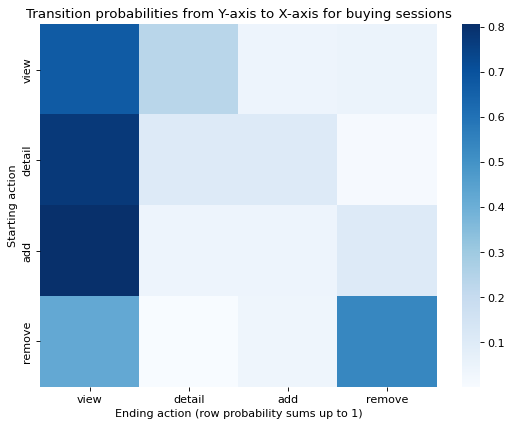

In [45]:
labels_view = ['view', 'detail', 'add', 'remove']

figure(figsize=(8, 6), dpi=80)
ax = plt.axes()

sns.heatmap(transitions_buy, cmap='Blues', xticklabels=labels_view, yticklabels=labels_view)
ax.set_title('Transition probabilities from Y-axis to X-axis for buying sessions')
ax.set_xlabel('Ending action (row probability sums up to 1)')
ax.set_ylabel('Starting action')

plt.show()

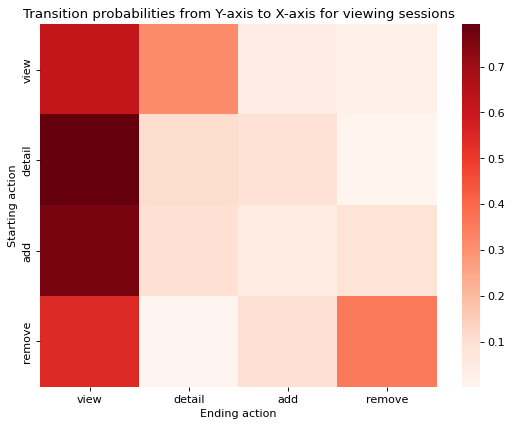

In [46]:
figure(figsize=(8, 6), dpi=80)
ax = plt.axes()
sns.heatmap(transitions_ws, cmap='Reds',xticklabels=labels_view, yticklabels=labels_view)
ax.set_title('Transition probabilities from Y-axis to X-axis for viewing sessions')
ax.set_xlabel('Ending action')
ax.set_ylabel('Starting action')
plt.show()

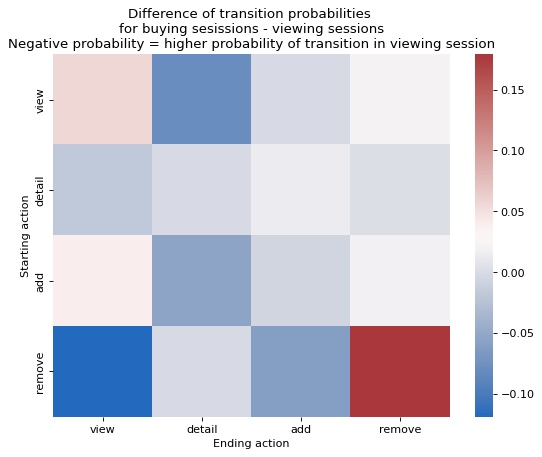

In [47]:
figure(figsize=(8, 6), dpi=80)
ax = plt.axes()
sns.heatmap(transitions_buy - transitions_ws, cmap='vlag', xticklabels=labels_view, yticklabels=labels_view)
ax.set_title('Difference of transition probabilities \nfor buying sesissions - viewing sessions\nNegative probability = higher probability of transition in viewing session')
ax.set_xlabel('Ending action')
ax.set_ylabel('Starting action')
plt.show()

In [ ]:
axes = 'log'
df_b_dummy = df_b
df_b_dummy['dummy_count'] = 1

fig = px.histogram(df_b, x="session_len", y="dummy_count", color="purchase",
                   marginal="box", # or violin, rug
                   barmode="group",
                   title = "Distribution of View Events Based on Purchase and Session Length"
                   #hover_data=df.columns)
)

fig.update_layout(xaxis_title="Session Length",
                  yaxis_title="Occurrence of scenarios")

if axes == 'log':
    fig.update_layout(yaxis=dict(type='log'), 
                      yaxis_title="Occurrence of scenarios on log scale")
if axes == 'normalized':
    fig.update_layout(yaxis_title="Normalized frequency of scenarios")
del df_b_dummy

fig.show()

# Task 4: Oracle Model

In [49]:
# TODO after deadline run oracle model for true test labels
# TODO save predictions one oracle for 5-event sessions, one for 10-event sessions, one for 15-event sessions

In [50]:
def computeOracle(oracle_sessions, oracle_labels):

    # create counter for each feature
    d = defaultdict(lambda: defaultdict(int))
    for session, label in zip(oracle_sessions, oracle_labels):
        d[str(tuple(session))][label] += 1

    oracle = {}
    oracle_actual = []
    oracle_prediction = []

    for i, (key, value) in enumerate(d.items()):

        oracle[key] = {}
        oracle[key]['SumSessions'] = value[0] + value[1]
        oracle[key]['SumNegative'] = value[0] 
        oracle[key]['SumPositive'] = value[1]

        # majority vote prediction
        if oracle[key]['SumNegative'] >= oracle[key]['SumPositive']:
            oracle_prediction.extend([0]*oracle[key]['SumSessions'])
        else:
            oracle_prediction.extend([0]*oracle[key]['SumSessions'])

        if oracle[key]['SumNegative'] > 0:
            oracle_actual.extend([0]*oracle[key]['SumNegative'])
        if oracle[key]['SumPositive'] > 0:
            oracle_actual.extend([1]*oracle[key]['SumPositive'])
    acc = accuracy_score(oracle_actual, oracle_prediction)
    f1 = f1_score(oracle_actual, oracle_prediction)

    print('Max oracle validation Accuracy: {}%'.format(round(acc,5)))
    print('Max oracle validation F1: {}%'.format(round(f1,5)))

    return oracle_prediction, acc, f1

oracle_prediction, acc, f1 = computeOracle(symbolised_sessions, labels)

Max oracle validation Accuracy: 0.7626%
Max oracle validation F1: 0.0%


In [51]:
# predictions_group[groupID]_oracle_at{5|10|15}.json
def saveSubmissionPredictionOracle(predictions, name):
    json_save = {}
    for i in range(len(predictions)):
        json_save[str(i)] = int(predictions[i])

    json.dump(json_save, open(os.path.join(DATA_FOLDER_SUBMISSION,name), "w"))

In [52]:
test_5 = json.load(open(os.path.join(DATA_FOLDER_TEST_DATA,'test_sessions_5.json'),"r")) # index , session
test_10 = json.load(open(os.path.join(DATA_FOLDER_TEST_DATA,'test_sessions_10.json'),"r")) # index , session
test_15 = json.load(open(os.path.join(DATA_FOLDER_TEST_DATA,'test_sessions_15.json'),"r")) # index , session

In [53]:
# weighted acc

# oracle = {}

# for i, (key, value) in enumerate(d.items()):
#     # if i < 13:
#     #     continue
#     # if i == 13:
#     #     value[0] = 1
#     #     value[1] = 2

#     # print(i, value[0], value[1])

#     oracle[key] = {}
#     oracle[key]['SumSessions'] = value[0] + value[1]
#     oracle[key]['SumNegative'] = value[0] 
#     oracle[key]['SumPositive'] = value[1]

#     oracle[key]['PositiveRatio'] =  value[0] / (value[0] + value[1])
#     oracle[key]['NegativeRatio'] =  value[0] / (value[0] + value[1])
    
#     oracle[key]['MaxACC'] = max(oracle[key]['NegativeRatio'], oracle[key]['PositiveRatio'])

#     oracle[key]['PredictionProbability'] = value[1] / (value[0] + value[1])
#     oracle[key]['Prediction'] = int(oracle[key]['PredictionProbability'] >= 0.5)


#     # oracle['count']
#     # if i == 15:
#     #     break


# SumItems = 0
# BestAccuracyWeighted = 0
# for i, (key, value) in enumerate(oracle.items()):
#     SumItems += value['SumSessions']
#     BestAccuracyWeighted += value['MaxACC']*value['SumSessions']

# oracle_weighted_accuracy =  BestAccuracyWeighted/SumItems
# print('The weighted accuracy the oracle model can achieve is: {}%'.format(round(oracle_accuracy*100,2)))

In [54]:
# example from class

# oracle = {}
# for session in d.keys():
#     n_buy, n_ws = 0, 0
#     for label in d[session].keys():
#         if label:
#             n_buy += d[session][label]
#         else:
#             n_ws += d[session][label]
#     oracle[session] = n_buy / (n_buy + n_ws)
    
# print(list(oracle.items())[:10])
# # if 0 -> upper bound is 100% acc
# # if 0.5 -> upper bound is 0% acc
# # if 0.5 -> upper bound is 100% acc

In [55]:
## Preprocessing (sessionized)

# Task 4: Oracle Model
# Create base
# TODO
# You will also immediately receive a test set (already pre-processed), consisting of three .json files containing sessions trimmed after 5, 10, and 15 events post add to cart, with no information about which are purchase sessions and which aren't. Use these files to make sure your pipeline can make predictions using those as input. You need to return files with the predicted label for each session, as obtained by running the baseline model and your own model of choice
# 1 point for each matching F1

# TODO simple oracle

# The oracle doesn't use ngrams! It doesn't need to derive features, it stores full sessions mapped to the labels with which each session is found at test.


# N-grams

In [56]:
"""The Naive Bayes baseline should only be fed 4-grams as input, 
not shorter n-grams: thanks for asking this, good point!

The Naive Bayes and Oracle have to be built as indicated, 
if you have a different pipeline you apply it for task 4. 
I reiterate: the results for the baseline and oracle have to 
be exactly the same for every group because the way to implement
them is fully given, with no degrees of freedom. The oracle has 
been implemented in class, and it should be implemented in the same way, 
don't overcomplicate things when it isn't necessary.
So no, don't drop columns that are very sparse for the baseline. 
These are all interesting things to try, but first you implement 
the oracle as indicated in class and fit the baseline as per instructions. 
Then, for Task 4, you try everything else you can think of."""


"The Naive Bayes baseline should only be fed 4-grams as input, \nnot shorter n-grams: thanks for asking this, good point!\n\nThe Naive Bayes and Oracle have to be built as indicated, \nif you have a different pipeline you apply it for task 4. \nI reiterate: the results for the baseline and oracle have to \nbe exactly the same for every group because the way to implement\nthem is fully given, with no degrees of freedom. The oracle has \nbeen implemented in class, and it should be implemented in the same way, \ndon't overcomplicate things when it isn't necessary.\nSo no, don't drop columns that are very sparse for the baseline. \nThese are all interesting things to try, but first you implement \nthe oracle as indicated in class and fit the baseline as per instructions. \nThen, for Task 4, you try everything else you can think of."

In [57]:
sessions_train, sessions_val, y_train, y_val = train_test_split(symbolised_sessions, labels, test_size=0.3, random_state=42)

In [58]:
def ngram_featurizer(session, n):
    
    """takes in a list and an integer defining the size of ngrams.
     Returns the ngrams of desired size in the input string"""
    
    session = ['#']*(n-1) + session + ['+']*(n-1)
    ngrams = [tuple(session[i:i+n]) for i in range(len(session)-n+1)]
    
    return ngrams
    

def encode_sessions(sessions, n, mapping=None):
    
    """
    Takes in a list of lists, an integer indicating the character ngrams' size,
    and a dictionary mapping ngrams to numerical indices. If no dictionary is passed,
    one is created inside the function.
    The function outputs a 2d NumPy array with as many rows as there are strings in 
    the input list, and the mapping from ngrams to indices, representing the columns 
    of the NumPy array.
    """
    
    if not mapping:
        all_ngrams = set()
        for session in sessions:
            all_ngrams = all_ngrams.union(set(ngram_featurizer(session, n)))
    
        mapping = {ngram: i for i, ngram in enumerate(all_ngrams)}
    
    X = np.zeros((len(sessions), len(mapping)))
    for i, session in enumerate(sessions):
        for ngram in ngram_featurizer(session, n):
            try:
                X[i, mapping[ngram]] += 1
            except KeyError:
                pass
    
    return X, mapping

In [59]:
X_train, mapping = encode_sessions(sessions_train, 4)
# print(mapping, end=' ')
# print(X_train[0,:])

In [60]:
X_val, _ = encode_sessions(sessions_val, 4, mapping=mapping)

In [61]:
X_test_5, _ = encode_sessions(test_5.values(), 4, mapping=mapping)
X_test_10, _ = encode_sessions(test_10.values(), 4, mapping=mapping)
X_test_15, _ = encode_sessions(test_15.values(), 4, mapping=mapping)

# Task 5: Error Analysis

In [62]:
def validationFunction(actual, prediction, target_names=['No Purchase', 'Purchase']):

    """
    Confusion Matrix: The confusion matrix is a table that summarizes the model's 
    predictions against the actual class labels. It provides an intuitive way to evaluate 
    the performance of a classifier by showing the number of true positives, true negatives, 
    false positives, and false negatives. You can use the confusion_matrix function from sklearn.metrics to 
    generate the confusion matrix.

    ROC Curve: The ROC (Receiver Operating Characteristic) curve is another useful visualization tool for evaluating 
    the performance of a binary classifier. It shows the trade-off between the true positive rate and the false positive 
    rate at different threshold values. You can use the roc_curve function from sklearn.metrics to generate the ROC curve.
    """


    print('Validation of Model based on validation set')
    acc = accuracy_score(actual, prediction) 
    f1 = f1_score(actual, prediction)
    print('Validation Accuracy: {}%'.format(round(acc,5)))
    print('Validation F1: {}%'.format(round(f1,5)))
    print('\nClassification report')
    print(classification_report(actual, prediction, target_names=target_names))
    
    print('\nConfusion matrix')
    confusion_matrix = metrics.confusion_matrix(actual, prediction)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['No Purchase', 'Purchase'])
    cm_display.plot()
    plt.show()

    print('\nWeighted confusion matrix')
    confusion_matrix = metrics.confusion_matrix(actual, prediction, normalize='true')
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['No Purchase', 'Purchase'])
    cm_display.plot()
    plt.show()

    def plot_roc_curve(actual, prediction):
        """
        plots the roc curve based of the probabilities
        """

        fpr, tpr, thresholds = roc_curve(actual, prediction)
        plt.plot(fpr, tpr)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')

    roc_auc = roc_auc_score(actual, prediction)

    print('model 1 AUC score: {}'.format(roc_auc))
    plot_roc_curve(actual, prediction)

    return acc, f1, roc_auc


# Task 2: Naive bayes

In [63]:
# fit NB classifier
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB(alpha=1, fit_prior=True)
NB.fit(X_train,y_train)

MultinomialNB(alpha=1)

In [64]:
def saveSubmissionPrediction(predictions, name):
    json_save = {}
    for i in range(len(predictions)):
        json_save[str(i)] = int(predictions[i])

    json.dump(json_save, open(os.path.join(DATA_FOLDER_SUBMISSION,name), "w"))

In [65]:
Y_val_pred_NB = NB.predict(X_val)

Y_test_5_pred_NB = NB.predict(X_test_5)
Y_test_10_pred_NB = NB.predict(X_test_10)
Y_test_15_pred_NB = NB.predict(X_test_15)
saveSubmissionPrediction(Y_test_5_pred_NB, 'predictions_group14_baseline_at5.json')
saveSubmissionPrediction(Y_test_10_pred_NB, 'predictions_group14_baseline_at10.json')
saveSubmissionPrediction(Y_test_15_pred_NB, 'predictions_group14_baseline_at15.json')

# TODO ask naming convention [14] or 14

Validation of Model based on validation set
Validation Accuracy: 0.72748%
Validation F1: 0.49481%

Classification report
              precision    recall  f1-score   support

 No Purchase       0.85      0.78      0.81     36897
    Purchase       0.44      0.56      0.49     11484

    accuracy                           0.73     48381
   macro avg       0.65      0.67      0.65     48381
weighted avg       0.75      0.73      0.74     48381


Confusion matrix


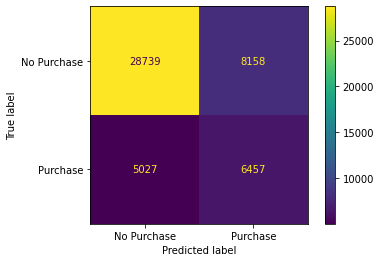


Weighted confusion matrix


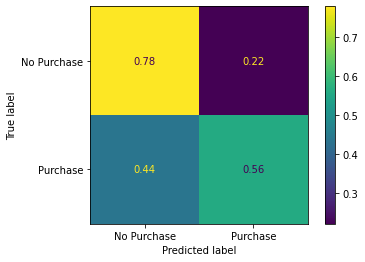

model 1 AUC score: 0.670579274893545


(0.7274756619334036, 0.4948082302003909, 0.670579274893545)

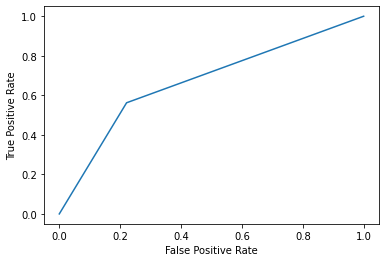

In [66]:
validationFunction(y_val, Y_val_pred_NB)

# Task 3: Machine Learning Models

In [67]:
# discover all estimators
from sklearn.utils import all_estimators

estimators = all_estimators(type_filter='classifier')
    
for name, class_ in estimators:
    module_name = str(class_).split("'")[1].split(".")[1]
    class_name = class_.__name__
    print(f'from sklearn.{module_name} import {class_name}')

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import CategoricalNB
from sklearn.multioutput import ClassifierChain
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
fr

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import CategoricalNB
from sklearn.multioutput import ClassifierChain
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

models = [    
    AdaBoostClassifier(),
    BaggingClassifier(),
    BernoulliNB(),
    # CalibratedClassifierCV(),
    # CategoricalNB(),
    ComplementNB(),
    DecisionTreeClassifier(),
    GaussianNB(),
    # GaussianProcessClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    LabelPropagation(),
    LabelSpreading(),
    LinearSVC(),
    LogisticRegression(),
    MultinomialNB(),
    NearestCentroid(),
    PassiveAggressiveClassifier(),
    Perceptron(),
    QuadraticDiscriminantAnalysis(),
    RadiusNeighborsClassifier(),
    RandomForestClassifier(),
    RidgeClassifier(),
    RidgeClassifierCV(),
    SGDClassifier(),
    SVC(),
    ExtraTreeClassifier(),
    ExtraTreesClassifier(),
    LinearDiscriminantAnalysis(),
    MLPClassifier(), #Neural Network
]

model_results = {}
for i, model in enumerate( models):
    try:
        start = time.time()

        print('\n')
        print(model.__class__.__name__, i+1,'/',len(models)+1)

        model.fit(X=X_train,y=y_train)

        Y_val_pred_model = model.predict(X_val)
        
        acc, f1, roc_auc = validationFunction(y_val, Y_val_pred_model)

        end = time.time()

        model_results[model.__class__.__name__] = {'accuracy':acc,'F1Score':f1,'roc_auc':roc_auc, 'TrainingTime':end - start }
    except:
        print(model.__class__.__name__, i+1,'/',len(models)+1, 'passed')
        pass
    model = None
    del model

In [ ]:
px.bar(x=list(model_results.keys()), y=[model_results[key]['TrainingTime'] for key in model_results.keys()], title="TrainingTime of different models")

In [ ]:
px.bar(x=list(model_results.keys()), y=[model_results[key]['accuracy'] for key in model_results.keys()], title="Accuracy metrics of different models")

In [ ]:
px.bar(x=list(model_results.keys()), y=[model_results[key]['F1Score'] for key in model_results.keys()], title="F1 score of different models")

In [ ]:
px.bar(x=list(model_results.keys()), y=[model_results[key]['roc_auc'] for key in model_results.keys()], title="roc_auc score of different models")

##  create predictions with best model

In [ ]:
### TODO downampling / upsampling (# never combine under and oversampling, # never combine under/oversampling with annomaly detection)


# Custom data pipeline

## Model creation data pipeline

In [258]:
# More hyperparameters
n_gram_len_max = 4
empty_cut = 99 # if values are more than 99% empty -> remove column

In [204]:
def dataPipeline(
        df_input, 
        df_name,
        n_gram_len_max, 
        outlier_start, 
        outlier_end, 
        empty_cut, 
        save = False,
        save_eda = False,
        ):
    
    print('Start data pipeline')
    print('Perform preprocessing step: {} (Filling na with view)'.format(1))
    df_p = prep_1_fill_na(df_raw.copy())

    print('Perform preprocessing step: {} (Grouping by session):'.format(2))
    df_p = prep_2_group(df_p)

    print('Perform preprocessing step: {} (Filtering df -> at least one add needs to be included)'.format(2.2))
    df_p = prep_2_2_filterAdd(df_p)

    print('Perform preprocessing step: {} (Creating buy or no buy label)'.format(3))
    df_p = prep_3_label(df_p)

    print('Perform preprocessing step: {} (Cut data before last buy)'.format(4))
    df_p = prep_4_cutBeforeLastBuy(df_p)

    print('Perform preprocessing step: {} (Create feature: Session length)'.format(5))
    df_p = prep_5_create_session_len(df_p)

    print('Perform preprocessing step: {} (Remove outliers based on session length)'.format(6))
    df_p = prep_6_remove_outliers(df_p, outlier_start, outlier_end)

    print('Perform preprocessing step: {} (Creating n_grams)'.format(7))
    df_p = prep_7_create_n_grams(n_gram_len_max, df_p)
    # save the eda data (unnormalized n_grams -> just counts)
    if save_eda:
        df_count = df[:] #copies the df
        
    print('Perform preprocessing step: {} (Normalize n_grams, counts->frequencies)'.format(8))
    df_p = prep_8_create_n_grams_normalized(n_gram_len_max, df_p)

    print('Perform preprocessing step: {} (Remove {}% empty n_gram columns)'.format(9,empty_cut))
    df_p, df_p_all_n_gram_columns_left =  prep_9_remove_empty_ngrams(df_p, n_gram_len_max, empty_cut)
    
    print('Perform preprocessing step: {} (Perform datetime transformation)'.format(10))
    df_p = prep_10_datetime_transformation(df_p)
    
    print('Perform preprocessing step: {} (Extract first timestamp)'.format(11))
    df_p = prep_11_datetime(df_p)
    
    print('Perform preprocessing step: {} (Create feature: Hour of the day, day of week ,weekend)'.format(12))
    df_p = prep_12_weekend_weekday_hour(df_p)
    
    print('Perform preprocessing step: {} (Create feature: Session length in time duration)'.format(13))
    df_p = prep_13_time_elapsed(df_p)
    
    print('Perform preprocessing step: {} (Create feature: Dwell time - average time between actions)'.format(14))
    df_p = prep_14_dwell(df_p)
    
    print('Perform preprocessing step: {} (Create feature: Count how many products were viewed'.format(15))
    df_p = prep_15_count_product_viewed(df_p)
    
    print('Perform preprocessing step: {} (Extract all feature columns)'.format(16))
    df_p_features, df_p_labels = prep_16_filterColumns(df_p, df_p_all_n_gram_columns_left)


    df_name_save = df_name[2:]
    if save_eda:
        print('Perform saving: EDA data:',"Data_features{}_n{}_eda_counts.csv".format(df_name_save,n_gram_len_max), "Data_labels{}_n{}_eda_counts.csv".format(df_name_save,n_gram_len_max))
        df_p_features_count = df_p_features[:]
        df_p_features_count[df_p_all_n_gram_columns_left] = df_count[df_p_all_n_gram_columns_left]
        del df_count
        df_p_features_count.to_csv(os.path.join(DATA_FOLDER_PREPROCESSING,"Data_features{}_n{}_eda_counts.csv".format(df_name_save,n_gram_len_max)), index=False)
        df_p_labels.to_csv(os.path.join(DATA_FOLDER_PREPROCESSING,"Data_labels{}_n{}_eda_counts.csv".format(df_name_save,n_gram_len_max)), index=False)
        
    if save:
        print('Perform saving:',"Data_features{}_n{}.csv".format(df_name_save,n_gram_len_max)  , "Data_labels{}_n{}.csv".format(df_name_save,n_gram_len_max) )
        df_p_features.to_csv(os.path.join(DATA_FOLDER_PREPROCESSING,"Data_features{}_n{}.csv".format(df_name_save,n_gram_len_max)), index=False)
        # save the target label
        df_p_labels.to_csv(os.path.join(DATA_FOLDER_PREPROCESSING,"Data_labels{}_n{}.csv".format(df_name_save,n_gram_len_max)), index=False)
        
        # try reading it 
        # pd.read_csv(os.path.join(DATA_FOLDER_PREPROCESSING,"Data_features{}_n{}.csv".format(df_name_save,n_gram_len_max)))
        # pd.read_csv(os.path.join(DATA_FOLDER_PREPROCESSING,"Data_labels{}_n{}.csv".format(df_name_save,n_gram_len_max)))

    return df_p_features, df_p_labels

In [205]:
run_data_pipeline = False # starts the data preprocessing pipeline
save = True 
save_eda = False
df_name = 'df'

if run_data_pipeline:
    df_features, df_labels  = dataPipeline(
        df, 
        df_name,
        n_gram_len_max, 
        outlier_start, 
        outlier_end, 
        empty_cut, 
        save = save, 
        save_eda=save_eda)
else:
    # read data
    df_name_save = df_name[2:]
    df_features = pd.read_csv(os.path.join(DATA_FOLDER_PREPROCESSING,"Data_features{}_n{}.csv".format(df_name_save,n_gram_len_max)))
    df_labels = pd.read_csv(os.path.join(DATA_FOLDER_PREPROCESSING,"Data_labels{}_n{}.csv".format(df_name_save,n_gram_len_max)))

In [206]:
## Train validation split

X_train, X_val, y_train, y_val = train_test_split(df_features, np.array(df_labels).ravel() , test_size=0.33, random_state=42)

## Real test data pipeline

# TODO debug:

In [208]:
def dataPipeline_test(
        df_input, 
        df_name,
        n_gram_len_max, 
        columns_keep_n_gram,
        keep_x_after_add, 
        save = False,
        ):
    print('Start real test data pipeline')
    print('Perform preprocessing step: {} (Filling na with view)'.format(1))
    df_p = prep_1_fill_na(df_input)

    print('Perform preprocessing step: {} (Grouping by session):'.format(2))
    df_p = prep_2_group(df_p)

    # not for testing
    # print('Perform preprocessing step: {} (Filtering df -> at least one add needs to be included)'.format(2.2))
    # df_p = prep_2_2_filterAdd(df_p)

    print('Perform preprocessing step: {} (Creating buy or no buy label)'.format(3))
    df_p = prep_3_label(df_p)

    # not cut before purchase, because this is not included in the data
    # print('Perform preprocessing step: {} (Cut data before last buy)'.format(4))
    # df_p = prep_4_cutBeforeLastBuy(df_p)

    # instead cut 5,10 and 15 after first add-to cart
    print('Perform preprocessing step: {} (Keep {} actions after first add)'.format(4, keep_x_after_add))
    df_p = prep_4_cutAfterAdd(df_p, keep_x_after_add)
    
    print('Perform preprocessing step: {} (Create feature: Session length)'.format(5))
    df_p = prep_5_create_session_len(df_p)

    # TODO if session len = 0 drop it!

    # print('Perform preprocessing step: {} (Remove outliers based on session length)'.format(6))
    # df_p = prep_6_remove_outliers(df_p, outlier_start, outlier_end)
    print('Perform preprocessing step: {} (Creating n_grams)'.format(7))
    df_p = prep_7_create_n_grams(n_gram_len_max, df_p)

    print('Perform preprocessing step: {} (Normalize n_grams, counts->frequencies)'.format(8))
    df_p = prep_8_create_n_grams_normalized(n_gram_len_max, df_p)

    print('Perform preprocessing step: {} (Remove {}% empty n_gram columns, use features from training)'.format(9,empty_cut))
    df_p, df_p_all_n_gram_columns_left =  prep_9_remove_empty_ngrams_not_in_training(df_p, n_gram_len_max, columns_keep_n_gram=columns_keep_n_gram)
    
    print('Perform preprocessing step: {} (Perform datetime transformation)'.format(10))
    df_p = prep_10_datetime_transformation(df_p)
    display(df_p)
    print('Perform preprocessing step: {} (Extract first timestamp)'.format(11))
    df_p = prep_11_datetime(df_p)
    
    print('Perform preprocessing step: {} (Create feature: Hour of the day, day of week ,weekend)'.format(12))
    df_p = prep_12_weekend_weekday_hour(df_p)
    
    print('Perform preprocessing step: {} (Create feature: Session length in time duration)'.format(13))
    df_p = prep_13_time_elapsed(df_p)
    
    print('Perform preprocessing step: {} (Create feature: Dwell time - average time between actions)'.format(14))
    df_p = prep_14_dwell(df_p)
    
    print('Perform preprocessing step: {} (Create feature: Count how many products were viewed'.format(15))
    df_p = prep_15_count_product_viewed(df_p)

    print('Perform preprocessing step: {} (Extract all feature columns)'.format(16))
    df_p_features, df_p_labels = prep_16_filterColumns(df_p, df_p_all_n_gram_columns_left+['session_id_hash'])

    df_name_save = df_name[2:]

    if save:
        print('Perform saving:',"Data_features{}_n{}.csv".format(df_name_save,n_gram_len_max)  , "Data_labels{}_n{}.csv".format(df_name_save,n_gram_len_max) )
        df_p_features.to_csv(os.path.join(DATA_FOLDER_PREPROCESSING,"Data_features{}_n{}.csv".format(df_name_save,n_gram_len_max)), index=False)
        # save the target label
        df_p_labels.to_csv(os.path.join(DATA_FOLDER_PREPROCESSING,"Data_labels{}_n{}.csv".format(df_name_save,n_gram_len_max)), index=False)
        
        # try reading it 
        # pd.read_csv(os.path.join(DATA_FOLDER_PREPROCESSING,"Data_features{}_n{}.csv".format(df_name_save,n_gram_len_max)))
        # pd.read_csv(os.path.join(DATA_FOLDER_PREPROCESSING,"Data_labels{}_n{}.csv".format(df_name_save,n_gram_len_max)))

    return df_p_features, df_p_labels

In [209]:
run_data_pipeline_test_real = True
save_test_real = True

if run_data_pipeline_test_real:
    # extract n_gram columns from df_features (some were deleted because they were empty) -> same features are needed in the test data
    columns_keep_n_gram = []
    for i in range(n_gram_len_max+1):
        n_grams_names = create_n_grams_names(i)
        for name in n_grams_names:
            if name in df_features.columns:
                columns_keep_n_gram.append(name)


    keep_x_after_add = 5
    df_name = 'df_real_test_5'
    # Early prediction will be evaluated at 5, 10, and 15 clicks after the first add-to-cart event in a session. 
    df_real_test_features_5, df_real_test_labels_5  = dataPipeline_test(
        df_test_real, 
        df_name, 
        n_gram_len_max, 
        columns_keep_n_gram,
        keep_x_after_add,
        save=save_test_real)

    keep_x_after_add = 10
    df_name = 'df_real_test_10'
    # Early prediction will be evaluated at 10, 10, and 110 clicks after the first add-to-cart event in a session. 
    df_real_test_features_10, df_real_test_labels_10  = dataPipeline_test(
        df_test_real, 
        df_name, 
        n_gram_len_max, 
        columns_keep_n_gram,
        keep_x_after_add,
        save=save_test_real)

    keep_x_after_add = 15
    df_name = 'df_real_test_15'
    # Early prediction will be evaluated at 15, 15, and 115 clicks after the first add-to-cart event in a session. 
    df_real_test_features_15, df_real_test_labels_15  = dataPipeline_test(
        df_test_real, 
        df_name, 
        n_gram_len_max, 
        columns_keep_n_gram,
        keep_x_after_add,
        save=save_test_real)

else:
    print('Load preprocessed data')
    df_name_save = '_real_test_5'
    df_real_test_features_5 = pd.read_csv(os.path.join(DATA_FOLDER_PREPROCESSING,"Data_features{}_n{}.csv".format(df_name_save,n_gram_len_max)))
    df_real_test_labels_5 = pd.read_csv(os.path.join(DATA_FOLDER_PREPROCESSING,"Data_labels{}_n{}.csv".format(df_name_save,n_gram_len_max)))

    df_name_save = '_real_test_10'
    df_real_test_features_10 = pd.read_csv(os.path.join(DATA_FOLDER_PREPROCESSING,"Data_features{}_n{}.csv".format(df_name_save,n_gram_len_max)))
    df_real_test_labels_10 = pd.read_csv(os.path.join(DATA_FOLDER_PREPROCESSING,"Data_labels{}_n{}.csv".format(df_name_save,n_gram_len_max)))
    
    df_name_save = '_real_test_15'
    df_real_test_features_15 = pd.read_csv(os.path.join(DATA_FOLDER_PREPROCESSING,"Data_features{}_n{}.csv".format(df_name_save,n_gram_len_max)))
    df_real_test_labels_15 = pd.read_csv(os.path.join(DATA_FOLDER_PREPROCESSING,"Data_labels{}_n{}.csv".format(df_name_save,n_gram_len_max)))

Start real test data pipeline
Perform preprocessing step: 1 (Filling na with view)
Perform preprocessing step: 2 (Grouping by session):
Perform preprocessing step: 3 (Creating buy or no buy label)
Perform preprocessing step: 4 (Keep 5 actions after first add)
Perform preprocessing step: 5 (Create feature: Session length)
Perform preprocessing step: 7 (Creating n_grams)
n_gram: 1


100%|██████████| 37552/37552 [00:13<00:00, 2877.60it/s]


n_gram: 2


100%|██████████| 37552/37552 [00:12<00:00, 2955.54it/s]


n_gram: 3


100%|██████████| 37552/37552 [00:11<00:00, 3323.92it/s]


n_gram: 4


100%|██████████| 37552/37552 [00:10<00:00, 3473.87it/s]


Perform preprocessing step: 8 (Normalize n_grams, counts->frequencies)
n-gram: 1
n-gram: 2
n-gram: 3
n-gram: 4
Perform preprocessing step: 9 (Remove 99% empty n_gram columns, use features from training)
Perform preprocessing step: 10 (Perform datetime transformation)


,view_view_view_view,view_view_view_detail,view_view_view_add,view_view_view_remove,view_view_detail_view,view_view_detail_detail,view_view_detail_add,view_view_detail_remove,view_view_add_view,view_view_remove_view,...,view,detail,add,remove,session_id_hash,product_sku_hash,purchase,session,session_len,timestamps
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.80,0.20,0.00,0.0,00024a2cbef8be2015bf16d355226c4b4d60b4e5216dea...,"[nan, 2ab1ba02f7ca5ec008fd4286405f1f1ef7ae86f1...",0,"[view, detail, view, view, view]",5,"[2019-02-23 13:06:41.183000+00:00, 2019-02-23 ..."
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.67,0.33,0.00,0.0,0006bbad7d1d1fb577307172adfb65bda305a6998050e7...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0,"[view, detail, view]",3,"[2019-03-04 22:27:05.667000+00:00, 2019-03-04 ..."
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.80,0.00,0.00,0.2,0007007d260df47d7c9cc306bdc2b4b6b8780d7ecc1c4d...,[ac162afe05d911e0c488047ef922e4315723aae7e4009...,0,"[view, remove, view, view, view]",5,"[2019-03-14 01:46:43.598000+00:00, 2019-03-14 ..."
3,0.0,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.80,0.20,0.00,0.0,000718b63f09e50c0e00f32038b2b5439b16082f4ebe0a...,[f29fbc934f4c2340801052adc981a3ad2703d02b59a5c...,0,"[view, view, view, detail, view]",5,"[2019-02-10 19:23:24.123000+00:00, 2019-02-10 ..."
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.60,0.40,0.00,0.0,000acdb2f21499ec80bc6ceecd59232d4111058330c365...,"[nan, ccd5e4bbee312793fc3c91a52285d8c17e07596c...",0,"[view, detail, view, view, detail]",5,"[2019-02-04 23:18:29.280000+00:00, 2019-02-04 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.00,0.00,0.00,0.0,fffce177594c5442f86fe17a9fb595bb441bf75500faf7...,"[nan, 75edba6339dd464324d17cc15646dcc19723199e...",0,"[view, view]",2,"[2019-02-05 00:40:10.124000+00:00, 2019-02-05 ..."
37548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.75,0.00,0.25,0.0,fffe10711d5b55829381151552ca72e07a85ae61e735fc...,"[nan, 9e0dd96e141aeb5ff347822febcfe36c12c07dde...",0,"[add, view, view, view]",4,"[2019-03-31 21:44:40.989000+00:00, 2019-03-31 ..."
37549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.00,0.00,0.00,0.0,fffea3098044d3337653f42e572f705dc641c8916c8a42...,"[nan, nan, nan, nan, nan, 4951550c72cc2037a518...",0,"[view, view]",2,"[2019-01-23 00:54:47.964000+00:00, 2019-01-23 ..."
37550,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.00,0.00,0.00,0.0,ffff2f2d1dbd19956c340e4e7df3ea2481695387755f4c...,"[nan, bb2b1094cc7f65b3497d1d6872317d7134804781...",0,"[view, view, view, view, view]",5,"[2019-01-20 00:27:32.261000+00:00, 2019-01-20 ..."


Perform preprocessing step: 11 (Extract first timestamp)


IndexError: list index out of range

## Task 5: Error analysis function

In [ ]:
def error_analysis():
    pass

# Based on transitions???

    """# (can be the baseline or your own model, or a comparison between their predictions and effectiveness) (5 pts: you can use any approach, you will get points based on the conclusions you draw from the error analysis, there isn't a right and wrong here, but sensible and not). This should feature in the notebook: use the dev set as your eval data: in real life you should do this on the test set, but since the test set complete with true labels will be released late to ensure a fair evaluation procedure, you should inspect your models' behavior using the dev set. TODO🚩
# Make sure to indicate clearly in the notebook which output matches a certain task, using the task ID. No points will be awarded if you fail to indicate which task a certain code-block or markdown cell is addressing.

# You should submit a complete notebook. If dependencies are required to run your code, make sure to install them at the beginning of the notebook. The only input files should be the ones you receive from me. Make sure you comment the code explaining what happens (use doc-strings to define what functions do, inline comments for more detailed information inside functions, as well as markdown cells to highlight the flow). If you submit undocumented code, you will automatically get a 1/10.

# You need 17 points out of 30 to pass, meaning that 17/30 translates to a 5.5/10. In principle you can pass if you submit predictions from a model which doesn't beat the baseline, but you have to do tasks 1, 2, and 4 perfectly. We have seen how to pre-process the data, build an oracle model and how to implement a Naive Bayes Classifier during the practicals, so you have a blueprint for the first three tasks. If you stop here, however, you won't pass the assignment, so you have to engage with the implementation of a new model or feed new info to the baseline architecture. If you want to get a grade higher than 8 or edge your chances to pass, you have to engage with the error analysis.

# IMPORTANT: I will consider predictions from one experimental model per group. You might have to test more than one (so derive a dev set from the training data to test different models), but only submit the one you think works best!! You can submit multiple times, but I'll consider the last file you submit (the last baseline predictions, the last experimental model predictions, the last oracle predictions, the last notebook)."""

# 5. do error analysis on one of the models (can be the baseline or your own model, or a comparison between their predictions and effectiveness) (<font color='red'>5 pts: you can use any approach, you will get points based on the conclusions you draw from the error analysis, there isn't a right and wrong here, but sensible and not). This should feature in the notebook: use the dev set as your eval data: in real life you should do this on the test set, but since the test set complete with true labels will be released late to ensure a fair evaluation procedure, you should inspect your models' behavior using the dev set.</font>

# Machine Learning